In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns 

In [2]:
df = pd.read_csv("spam_data.csv")
df

,label,message
0,spam,Earn money from home easily. Join today!
1,spam,Exclusive rewards available. Register now!
2,ham,Did you finish your homework?
3,ham,Happy Birthday! Have a wonderful day!
4,ham,Good morning! Have a nice day.
...,...,...
495,ham,I’ll call you once I reach home.
496,spam,"You’ve won a lottery of ₹1,00,000. Contact us ..."
497,ham,Let’s meet at 6 near the mall.
498,ham,Good morning! Have a nice day.


In [3]:
x = df['message']
y = df["label"]

In [4]:
vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)
x_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3335 stored elements and shape (500, 174)>

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x_vectorized,y, test_size=0.2, random_state= 20)

In [6]:
model = MultinomialNB()
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
y_pred = model.predict(x_test)
y_pred

array(['spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham',
       'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam',
       'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam'], dtype='<U4')

In [8]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

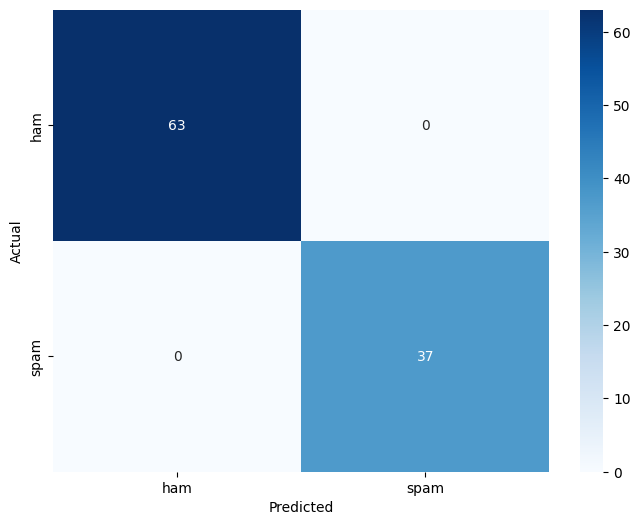

In [10]:
plt.figure(figsize=(8,6))
cm = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames= ["Predicted"])
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

In [11]:
new_data = ["Win exciting prizes now! Click the link to claim.",
            "Can you share the notes from yesterday’s class?"]
new_data_vectorized = vectorizer.transform(new_data)
prediction = model.predict(new_data_vectorized)
for message,label in zip(new_data,prediction):
    print(f'Message : "{message}" => Predicted Label: {label}')

Message : "Win exciting prizes now! Click the link to claim." => Predicted Label: spam
Message : "Can you share the notes from yesterday’s class?" => Predicted Label: ham
